In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dfRetro = pd.read_csv('C:\\Users\\Sam\\Documents\\Data Mining\\Project\\retrosheet-events-plus-woba-2005_2015.csv')
altitudes = pd.read_excel("C:\\Users\\Sam\\Documents\\Data Mining\\Project\\Park_Factor\\Project_Code\\MLB_Stadium_Altitudes.xlsx")


In [3]:
dfRetro = dfRetro.drop(['time_since_1900', 'wOBA_pts', 'bat_hand_cd', 'base1_run_id', 'base2_run_id', 'base3_run_id','pitch_seq_tx','po1_fld_cd', 'po2_fld_cd','pit_start_fl', 'pa_ball_ct', 'pa_strike_ct', 'bat_fate_id', 'run1_fate_id', 'run2_fate_id', 'run3_fate_id', 'battedball_cd', 'inn_new_fl', 'inn_end_fl', 'pit_hand_cd'], axis=1)


In [4]:
#now drop any unnecessary events we don't need 
#stolen bases (4), caught stealing (6), pickoff (8), 
print(len(dfRetro))

dfRetro = dfRetro[dfRetro.event_cd != 4]
dfRetro = dfRetro[dfRetro.event_cd != 6]
dfRetro = dfRetro[dfRetro.event_cd != 8]


print(len(dfRetro))

2111526
2069898


In [5]:
events_with_altitudes = pd.merge(dfRetro, altitudes, on='home_team_id')


In [6]:
###Calculating runs per 9 here 
team_ids = []
for ii in dfRetro.home_team_id.unique():
    team_ids.append(ii)
team_ids = sorted(team_ids)
total_runs = [[0 for i in range(2)] for j in range(30)] 
for i in range(0,30):
     total_runs[i][0] = team_ids[i]
for i in range(0,30):
    
    for j in range(0,len(events_with_altitudes)):
    
        if events_with_altitudes['home_team_id'][j] == total_runs[i][0]:
        
            total_runs[i][1] += events_with_altitudes['event_runs_ct'][j]

In [7]:
test = events_with_altitudes.drop_duplicates('game_id')
games_played = test.groupby('home_team_id').size()
#print(games_played)
innings_played = games_played * 9
print(innings_played)
print(total_runs)

home_team_id
ANA    8019
ARI    8019
ATL    8019
BAL    8010
BOS    8019
CHA    8019
CHN    8010
CIN    8028
CLE    8001
COL    8019
DET    8019
FLO    5103
HOU    8010
KCA    8019
LAN    8019
MIA    2916
MIL    8019
MIN    8019
NYA    8019
NYN    8019
OAK    8019
PHI    8019
PIT    8019
SDN    8019
SEA    8028
SFN    8019
SLN    8010
TBA    8019
TEX    8019
TOR    8019
WAS    8001
dtype: int64
[['ANA', 7630], ['ARI', 8401], ['ATL', 7486], ['BAL', 8452], ['BOS', 8906], ['CHA', 8169], ['CHN', 7919], ['CIN', 8175], ['CLE', 7924], ['COL', 9702], ['DET', 8375], ['FLO', 5227], ['HOU', 7603], ['KCA', 8179], ['LAN', 7128], ['MIA', 2543], ['MIL', 8086], ['MIN', 7994], ['NYA', 8574], ['NYN', 7303], ['OAK', 7405], ['PHI', 8127], ['PIT', 7517], ['SDN', 6599], ['SEA', 7086], ['SFN', 7012], ['SLN', 7511], ['TBA', 7626], ['TEX', 8995], ['TOR', 8211]]


In [8]:
runs_per_9 = [[0 for i in range(2)] for j in range(30)] 
for i in range(0,30):
     runs_per_9[i][0] = team_ids[i]
#print(runs_per_9)

for i in range(len(total_runs)):
    print(team_ids[i], total_runs[i][1], innings_played[i])
    #print(innings_played[i])
    num = (total_runs[i][1] * 9)
    denom = innings_played[i]
    runs_per_9[i][1] = num/denom
    #runs_per_9[i][1] = ((total_runs[i][1] * 9)/innings_played[i])
print(runs_per_9)

ANA 7630 8019
ARI 8401 8019
ATL 7486 8019
BAL 8452 8010
BOS 8906 8019
CHA 8169 8019
CHN 7919 8010
CIN 8175 8028
CLE 7924 8001
COL 9702 8019
DET 8375 8019
FLO 5227 5103
HOU 7603 8010
KCA 8179 8019
LAN 7128 8019
MIA 2543 2916
MIL 8086 8019
MIN 7994 8019
NYA 8574 8019
NYN 7303 8019
OAK 7405 8019
PHI 8127 8019
PIT 7517 8019
SDN 6599 8019
SEA 7086 8028
SFN 7012 8019
SLN 7511 8010
TBA 7626 8019
TEX 8995 8019
TOR 8211 8019
[['ANA', 8.5634118967452295], ['ARI', 9.4287317620650946], ['ATL', 8.4017957351290686], ['BAL', 9.4966292134831463], ['BOS', 9.9955106621773293], ['CHA', 9.1683501683501678], ['CHN', 8.8977528089887645], ['CIN', 9.1647982062780269], ['CLE', 8.9133858267716537], ['COL', 10.888888888888889], ['DET', 9.3995510662177324], ['FLO', 9.2186948853615522], ['HOU', 8.5426966292134825], ['KCA', 9.1795735129068454], ['LAN', 8.0], ['MIA', 7.8487654320987659], ['MIL', 9.0751964085297416], ['MIN', 8.9719416386083051], ['NYA', 9.6228956228956228], ['NYN', 8.1964085297418627], ['OAK', 8.3108

In [9]:
per_9 = []
for ii in range(len(runs_per_9)):
    per_9.append(runs_per_9[ii][1])
print(per_9)

[8.5634118967452295, 9.4287317620650946, 8.4017957351290686, 9.4966292134831463, 9.9955106621773293, 9.1683501683501678, 8.8977528089887645, 9.1647982062780269, 8.9133858267716537, 10.888888888888889, 9.3995510662177324, 9.2186948853615522, 8.5426966292134825, 9.1795735129068454, 8.0, 7.8487654320987659, 9.0751964085297416, 8.9719416386083051, 9.6228956228956228, 8.1964085297418627, 8.3108866442199769, 9.1212121212121211, 8.4365881032547705, 7.4062850729517393, 7.9439461883408073, 7.8698092031425366, 8.4393258426966291, 8.5589225589225588, 10.095398428731762, 9.2154882154882163]


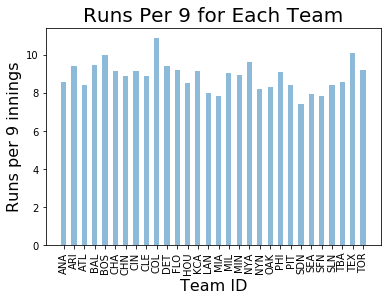

In [10]:
plt.title("Runs Per 9 for Each Team", size=20)
plt.xlabel("Team ID", size=16)
plt.ylabel("Runs per 9 innings", size=16)
y_pos = np.arange(len(runs_per_9))
plt.bar(y_pos, per_9, align='center', alpha=0.5, width=0.5)
plt.xticks(y_pos, team_ids, rotation='vertical')
plt.figure(figsize=(50, 3))

plt.show()